In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv


In [2]:
# Imports

import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal 
import random

In [3]:
# Reading the data

data = pd.read_csv("/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv",sep=",",)
print("Data dimension: ",data.shape)

Data dimension:  (10000, 6)


In [4]:
print(data.columns)

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')


In [5]:
#Renaming the columns

data.columns = ['Hours_Studied', 'Previous_Scores', 'Extracurricular_Activities',
       'Sleep_Hours', 'Sample_Question_Papers_Practiced', 'Performance_Index']

### Exploratory Data analysis

In [6]:
# check for missing data

data.isna().sum()

Hours_Studied                       0
Previous_Scores                     0
Extracurricular_Activities          0
Sleep_Hours                         0
Sample_Question_Papers_Practiced    0
Performance_Index                   0
dtype: int64

In [7]:
data.dtypes

Hours_Studied                         int64
Previous_Scores                       int64
Extracurricular_Activities           object
Sleep_Hours                           int64
Sample_Question_Papers_Practiced      int64
Performance_Index                   float64
dtype: object

<span style="color: blue;">**Hours studied**</span>

In [8]:
print (data.iloc[:,0].describe())

count    10000.000000
mean         4.992900
std          2.589309
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: Hours_Studied, dtype: float64


Text(0.5, 1.0, 'Hours studied - Boxplot')

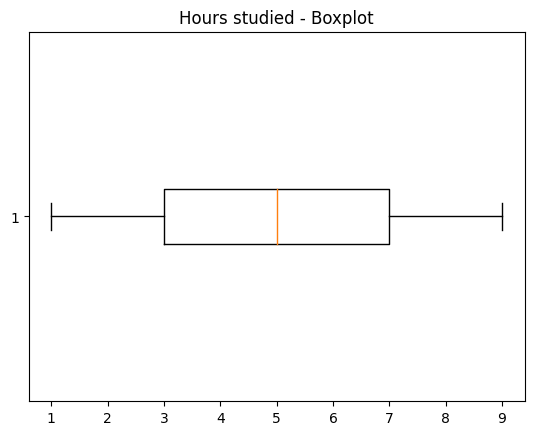

In [9]:
plt.boxplot(data.iloc[:,0],vert=False)
plt.title("Hours studied - Boxplot")

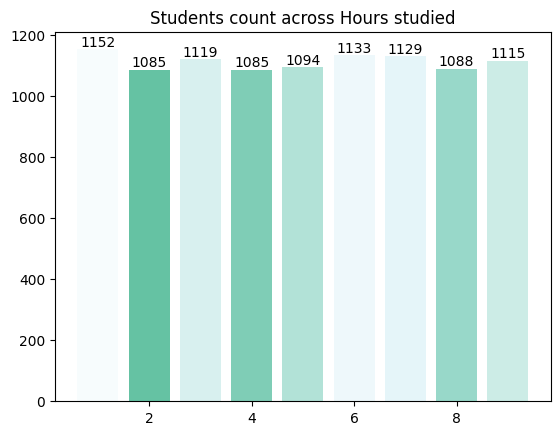

In [10]:
d = data.iloc[:,0]
fig,axs = plt.subplots()
bar_1 = axs.bar(d.value_counts().index,d.value_counts().values, color = plt.cm.BuGn(np.linspace(0,0.5,9)))
axs.bar_label(bar_1)
axs.set_title("Students count across Hours studied")
plt.show()

***Hours studied:***  
Average hours studied by a student is 5 hrs  
Almost 50 % of student studied above 5 hrs  
Max hours studied by a student is 9hrs  
Min hour studied by a student is 1 hr  

<span style="color: blue;">**Previous scores**</span>

In [11]:
print(data.iloc[:,1].describe())

count    10000.000000
mean        69.445700
std         17.343152
min         40.000000
25%         54.000000
50%         69.000000
75%         85.000000
max         99.000000
Name: Previous_Scores, dtype: float64


Text(0.5, 1.0, 'Previous scores')

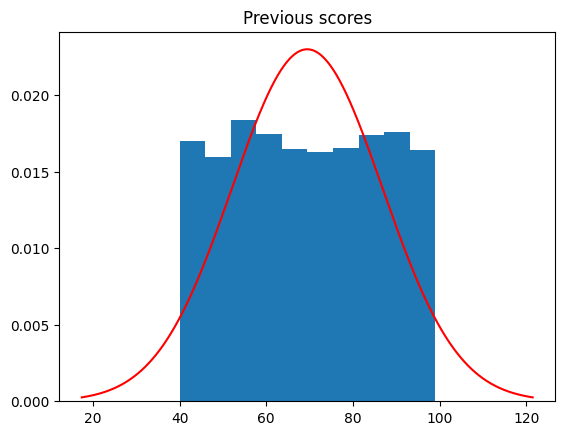

In [12]:
d = data.iloc[:,1]
mu = d.mean()
sigma = d.std()
x_axis = np.linspace(mu-3*sigma,mu+3*sigma,1000)
pdf_density = norm.pdf(x_axis, mu, sigma)

plt.hist(d,density = True)
plt.plot(x_axis,pdf_density,"r")
plt.title("Previous scores")

Text(0, 0.5, 'Performance Index')

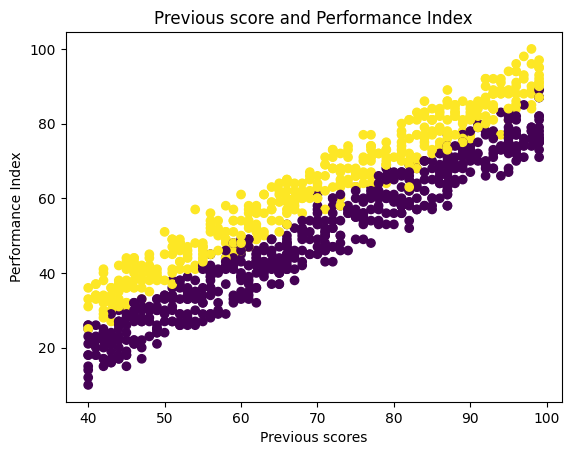

In [13]:
study_hrs = [1 if data[0:1000].Hours_Studied[i] >= 6 else 0 for i in range(1000)]

plt.scatter(data[0:1000].Previous_Scores,data[0:1000].Performance_Index , c = study_hrs)
plt.title("Previous score and Performance Index")
plt.xlabel("Previous scores")
plt.ylabel("Performance Index")

***Previous scores:***  
Students scored between 40 to 99  
Scores are uniformly distributed

<span style="color: blue;">**Extracurricular activities**</span>

In [14]:
print("Count of students involved in ")
print(data.iloc[:,2].groupby(by=data.iloc[:,2]).count())

Count of students involved in 
Extracurricular_Activities
No     5052
Yes    4948
Name: Extracurricular_Activities, dtype: int64


***Extracurriculars:***  
Almost half the students were not involved in extracurriculars and the other half did


In [15]:
#coding the Yes - 1 and No-0

temp = [1 if data.iloc[i,2]=="Yes" else 0 for i in range(len(data))]
data.Extracurricular_Activities = temp

In [16]:
print(data.Extracurricular_Activities)

0       1
1       0
2       1
3       1
4       0
       ..
9995    1
9996    1
9997    1
9998    1
9999    0
Name: Extracurricular_Activities, Length: 10000, dtype: int64


<span style="color: blue;">**Sleep Hours**</span>

In [17]:
d = data.iloc[:,3]
d.describe()

count    10000.000000
mean         6.530600
std          1.695863
min          4.000000
25%          5.000000
50%          7.000000
75%          8.000000
max          9.000000
Name: Sleep_Hours, dtype: float64

Text(0.5, 1.0, 'Sleep Hours')

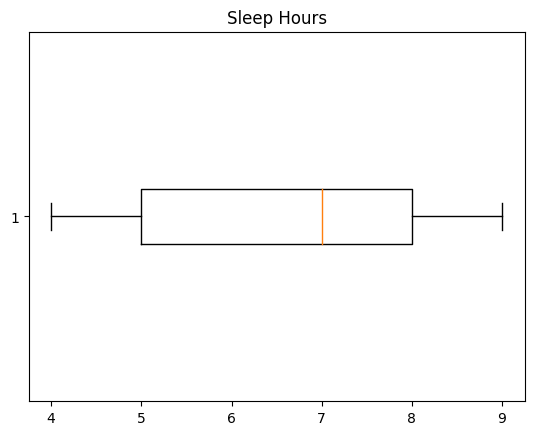

In [18]:
plt.boxplot(d,vert=False)
plt.title("Sleep Hours")

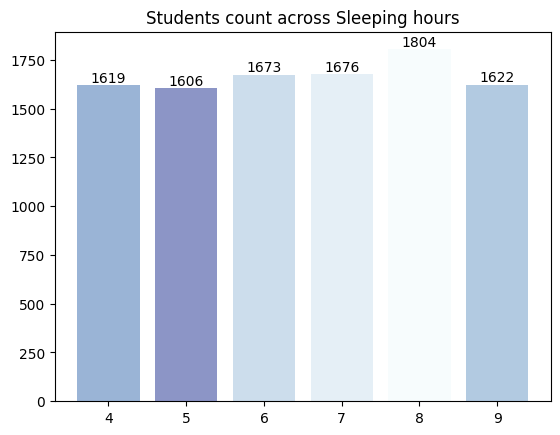

In [19]:
fig,axs = plt.subplots()
bar = axs.bar(d.value_counts().index,d.value_counts().values,color = plt.cm.BuPu(np.linspace(0,0.5,6)))
axs.bar_label(bar)
axs.set_title("Students count across Sleeping hours")
plt.show()

***Sleep Hours***  
Average sleeping hours is 7 hrs  
50 % of students slept less than 7 hrs  
25% of students slept more than 8 hrs  

<span style="color: blue;">***Sample question paper practiced***</span>

In [20]:
d = data.iloc[:,4]
d.describe()

count    10000.000000
mean         4.583300
std          2.867348
min          0.000000
25%          2.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: Sample_Question_Papers_Practiced, dtype: float64

Text(0.5, 1.0, 'Sample question paper practiced')

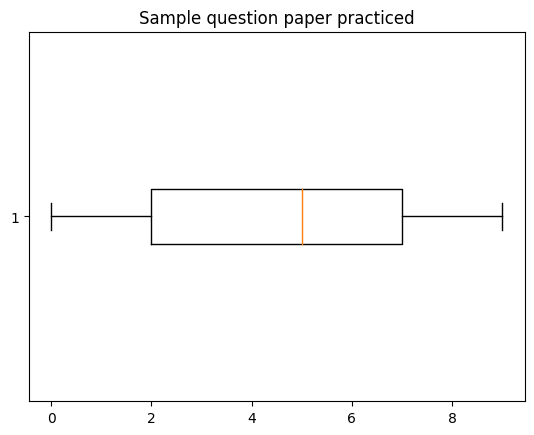

In [21]:
plt.boxplot(d,vert=False)
plt.title("Sample question paper practiced")

In [22]:
d.value_counts()

Sample_Question_Papers_Practiced
6    1059
9    1051
3    1035
5    1028
8    1026
7     987
1     978
4     955
0     951
2     930
Name: count, dtype: int64

***Question paper practiced***  
Paper practiced range from 0 to 9   
Average paper practiced is 5  
25% percent of students practiced more than 7 quesion papers

### Modelling

<span style="color: blue;">***Baseline model***</span>

In [23]:
y_pred = data.loc[:,"Performance_Index"].mean()
mse = data.loc[:,"Performance_Index"].var()
print("Baseline model")
print("Mean squared error: ",mse)

Baseline model
Mean squared error:  369.1223771977198


In [24]:
perm = np.random.permutation(len(data))
train_idx = perm[0:9000]
test_idx = perm[9000:]

train_x = data.iloc[train_idx,:-1]
train_y = data.iloc[train_idx,-1]

test_x = data.iloc[test_idx,:-1]
test_y = data.iloc[test_idx,-1]

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(9000, 5)
(9000,)
(1000, 5)
(1000,)


<span style="color: blue;">***Linear regression model***</span>

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [26]:
regr = LinearRegression()
regr.fit(train_x,train_y)
y_pred = regr.predict(test_x)
mse = mean_squared_error(test_y,y_pred)
print("Liner regression model")
print("Mean square error: ",mse)

Liner regression model
Mean square error:  4.092220525573533


In [27]:
print(y_pred[0:10])
print(test_y[0:10])

[40.43281727 35.02994082 70.14675223 54.47390357 81.78209725 73.65579885
 78.05072338 46.27811201 47.69855285 24.43390229]
3015    43.0
9941    36.0
7710    70.0
8248    53.0
4937    81.0
2026    74.0
5192    76.0
4574    45.0
3970    47.0
9063    25.0
Name: Performance_Index, dtype: float64


In [28]:
print("Least square line: y = wx + b")

print("w = ",regr.coef_)
print("b = ",regr.intercept_)


Least square line: y = wx + b
w =  [2.85128578 1.01866313 0.61937709 0.4789004  0.19346433]
b =  -34.07135212578591
